In [1]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)

In [2]:
# data needs to be inputted
data_in = pd.read_csv('koyfin_VGT_holdings.csv')
risky_assets = data_in[:10]['Ticker'].tolist()

In [3]:
# data parameters
n_monto_carlo = 10 ** 6
start_date = '2018-01-01'
end_date = '2024-01-01'
n_assets = len(risky_assets)

In [4]:
# download the data
prices_df = yf.download(risky_assets, start=start_date, end=end_date)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
N_DAYS = prices_df.shape[0]
prices_df.head(3)

[*********************100%%**********************]  10 of 10 completed

Downloaded 1509 rows of data.


Price       Adj Close                                                         \
Ticker           AAPL         ACN        ADBE    AMD        AVGO         CRM   
Date                                                                           
2018-01-02  40.615891  139.834579  177.699997  10.98  215.173935  104.273796   
2018-01-03  40.608822  140.479965  181.039993  11.55  217.527084  105.152641   
2018-01-04  40.797440  142.143356  183.220001  12.12  217.599594  106.540833   

Price                                                  ...     Volume  \
Ticker           CSCO       MSFT      NVDA       ORCL  ...       AAPL   
Date                                                   ...              
2018-01-02  31.896217  79.936745  4.930642  41.983753  ...  102223600   
2018-01-03  32.150661  80.308754  5.255147  42.956142  ...  118071600   
2018-01-04  32.241631  81.015594  5.282850  43.379311  ...   89738400   

Price                                                                          \
Ticker          ACN     ADBE        AMD     AVGO      CRM      CSCO      MSFT   
Date                                                                            
2018-01-02  3061900  2432800   44146300  3313500  4669200  20135700  22483800   
2018-01-03  2064200  2561200  154066700  3116100  3888700  29536000  26061400   
2018-01-04  1777000  2211400  109503000  1906700  4540200  20731400  21912000   

Price                            
Ticker           NVDA      ORCL  
Date                             
2018-01-02  355616000  25380000  
2018-01-03  914704000  24165000  
2018-01-04  583268000  19815100  

[3 rows x 60 columns]

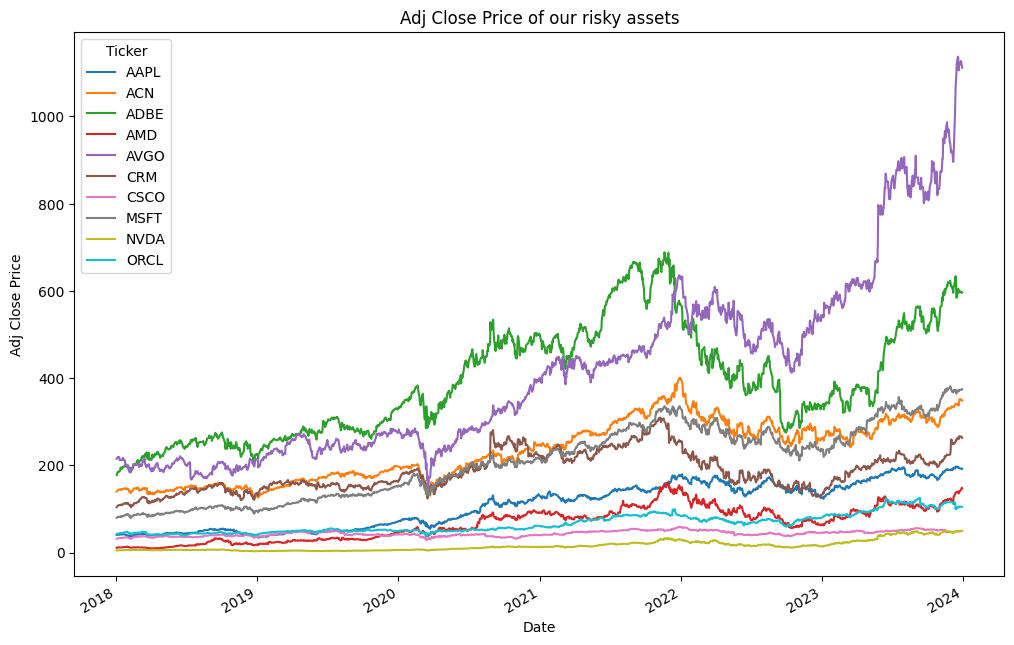

In [5]:
# choose Adj Close
prices_df['Adj Close'].plot(title='Adj Close Price of our risky assets')
plt.ylabel('Adj Close Price')
plt.show()

In [6]:
# caculate the percentage returns
returns_df = prices_df['Adj Close'].pct_change().dropna()
returns_df.head()

Ticker,AAPL,ACN,ADBE,AMD,AVGO,CRM,CSCO,MSFT,NVDA,ORCL
Date,,,,,,,,,,
2018-01-03,-0.000174,0.004615,0.018796,0.051913,0.010936,0.008428,0.007977,0.004654,0.065814,0.023161
2018-01-04,0.004645,0.011841,0.012042,0.049351,0.000333,0.013202,0.002829,0.008802,0.005272,0.009851
2018-01-05,0.011385,0.008249,0.011571,-0.019802,0.005926,0.013311,0.013850,0.012398,0.008474,0.006019
2018-01-08,-0.003714,0.007991,-0.001619,0.033670,0.002393,0.007031,0.010372,0.001020,0.030641,0.010522
2018-01-09,-0.000115,0.003335,0.008971,-0.037459,-0.013846,0.002664,-0.006259,-0.000679,-0.000270,0.005534


# 平均回报率和协方差矩阵

In [7]:
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS
avg_returns, cov_mat

(Ticker
 AAPL    1.855747
 ACN     1.139396
 ADBE    1.615222
 AMD     3.509407
 AVGO    2.045260
 CRM     1.347518
 CSCO    0.680079
 MSFT    1.818217
 NVDA    3.099012
 ORCL    1.181827
 dtype: float64,
 Ticker      AAPL       ACN      ADBE       AMD      AVGO       CRM      CSCO  \
 Ticker                                                                         
 AAPL    0.600865  0.328983  0.463554  0.571188  0.430258  0.416313  0.310700   
 ACN     0.328983  0.453310  0.384718  0.424772  0.359624  0.365150  0.286525   
 ADBE    0.463554  0.384718  0.801551  0.687758  0.471171  0.598034  0.329686   
 AMD     0.571188  0.424772  0.687758  1.830304  0.664248  0.626616  0.399864   
 AVGO    0.430258  0.359624  0.471171  0.664248  0.796584  0.419543  0.340200   
 CRM     0.416313  0.365150  0.598034  0.626616  0.419543  0.851733  0.301608   
 CSCO    0.310700  0.286525  0.329686  0.399864  0.340200  0.301608  0.468242   
 MSFT    0.428472  0.351495  0.517881  0.572599  0.411805  0.46364

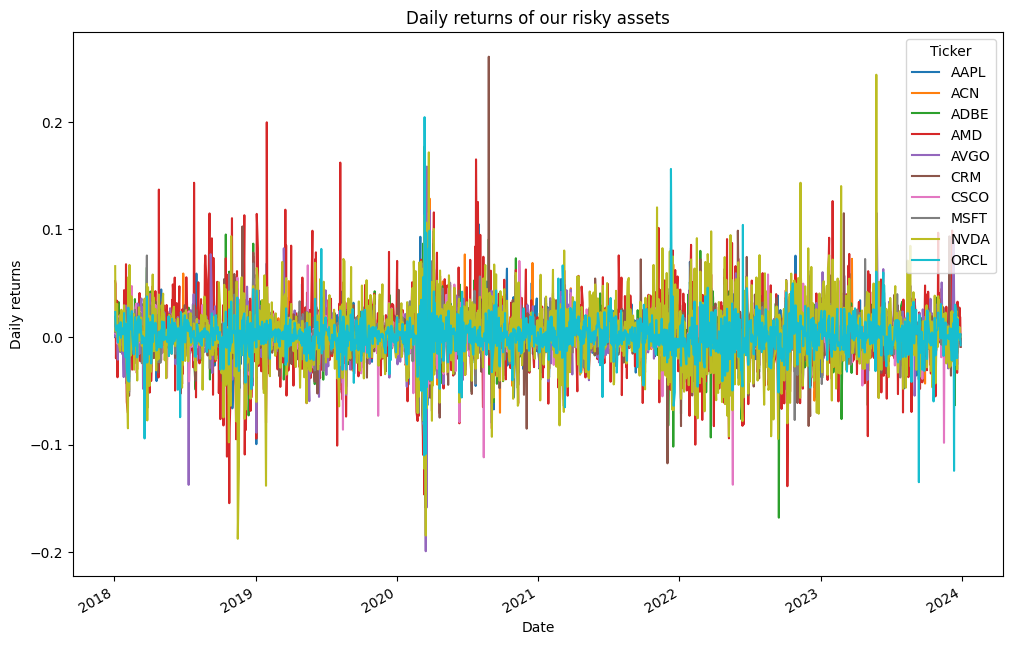

In [8]:
returns_df.plot(title='Daily returns of our risky assets')
plt.ylabel('Daily returns')
plt.show()

In [9]:
np.random.seed(666)
weights = np.random.random(size=(n_monto_carlo, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [10]:
portf_rtns = weights @ avg_returns

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(weights[i] @ cov_mat @ weights[i].T))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [11]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})

In [12]:
n_internal = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), portf_results_df.returns.max(), n_internal)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for index in range(n_internal):
    if portf_rtns_ef[index] not in portf_rtns:
        indices_to_skip.append(index)
        continue
    matched_index = np.where(portf_rtns == portf_rtns_ef[index])
    portf_vol_ef.append(np.min(portf_vol[matched_index]))


# delete the inner dot
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

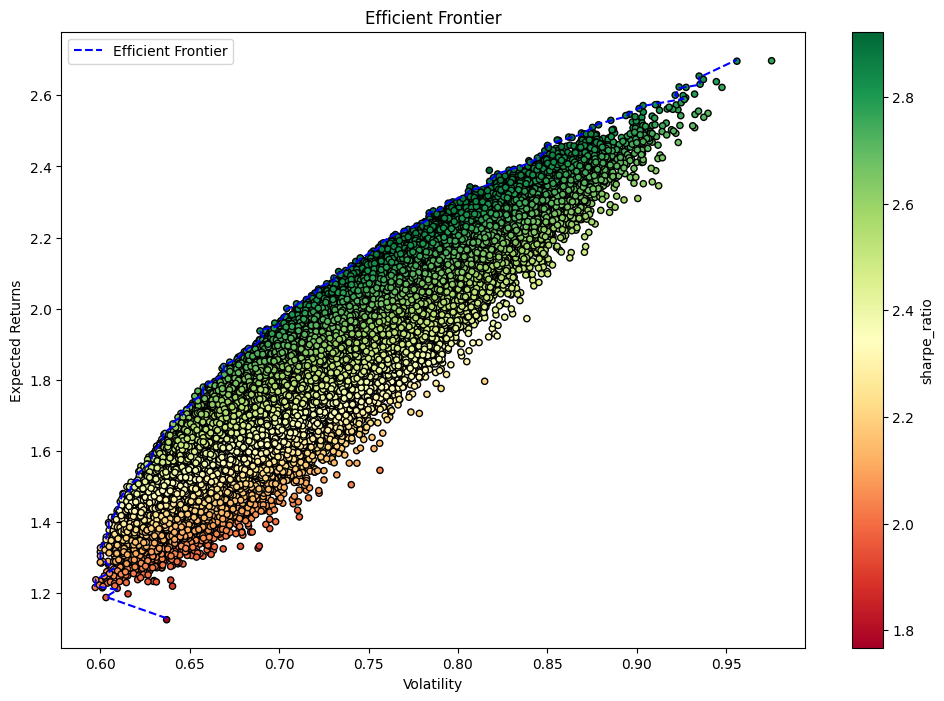

In [13]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio',\
                      cmap='RdYlGn', edgecolors='black', ax=ax)
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--', label='Efficient Frontier')
ax.legend()
plt.show()

In [14]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [15]:
print('Maximum Sharpe Ratio portfolio --->')
print('Performance:')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights:')
for x, y in zip(risky_assets, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio --->
Performance:
returns: 238.90% volatility: 81.75% sharpe_ratio: 292.22% 
Weights:
MSFT: 20.13% AAPL: 1.31% NVDA: 0.29% AVGO: 31.00% CRM: 12.30% AMD: 0.37% ADBE: 1.03% CSCO: 27.56% ACN: 3.77% ORCL: 2.23% 

In [16]:
data_in[['Ticker', 'Weight']].head(9)

,Ticker,Weight
0,MSFT,0.1735
1,AAPL,0.1533
2,NVDA,0.1194
3,AVGO,0.0441
4,CRM,0.0200
5,AMD,0.0196
6,ADBE,0.0161
7,CSCO,0.0147
8,ACN,0.0145


In [17]:
print('Minimum Volatility portfolio --->')
print('Performance:')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights:')
for x, y in zip(risky_assets, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio --->
Performance:
returns: 121.65% volatility: 59.71% sharpe_ratio: 203.74% 
Weights:
MSFT: 2.43% AAPL: 18.36% NVDA: 2.85% AVGO: 0.54% CRM: 9.23% AMD: 2.60% ADBE: 30.61% CSCO: 8.26% ACN: 0.95% ORCL: 24.18% 

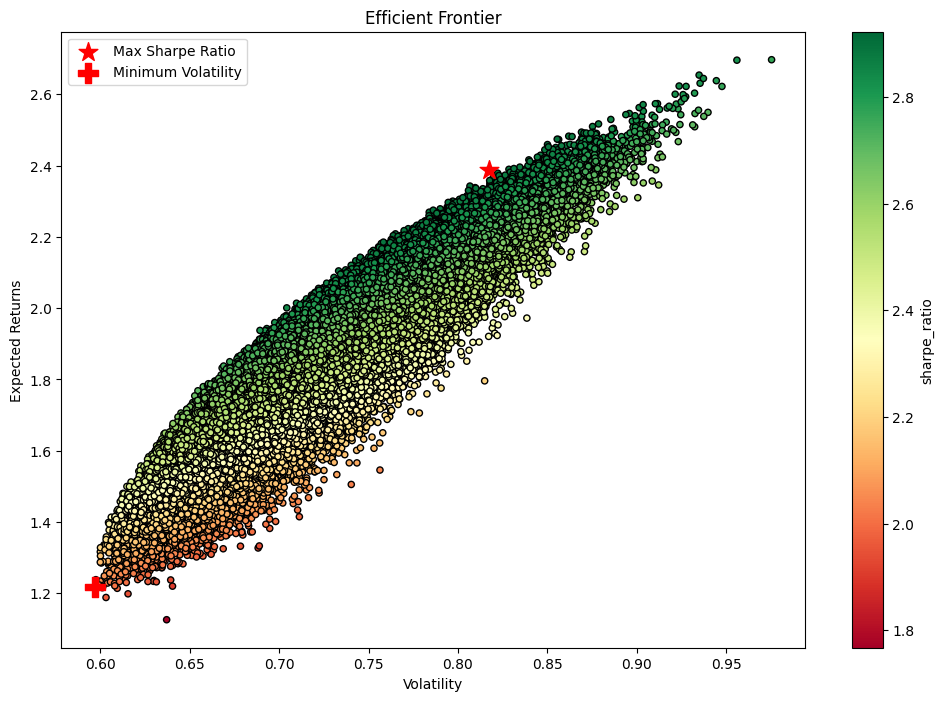

In [18]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', ax=ax)
ax.scatter(x=max_sharpe_portf.volatility, y=max_sharpe_portf.returns, 
           c='red', marker='*', s=200, label='Max Sharpe Ratio')
ax.scatter(x=min_vol_portf.volatility, y=min_vol_portf.returns, 
           c='red', marker='P', s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.legend()
plt.show()